In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [7]:
def fit_polynomial(data, coordinate, coordinate_ranges, degree):
    # Create an xarray Dataset with the measured data
    ds = xr.Dataset({"data": (coordinate, data)})

    # Select the data within the specified coordinate ranges
    ds_ranges = [ds.sel({coordinate: slice(*cr)}) for cr in coordinate_ranges]

    # Extract the coordinate values and data as numpy arrays
    x = np.concatenate([ds_range[coordinate].values for ds_range in ds_ranges])
    y = np.concatenate([ds_range["data"].values for ds_range in ds_ranges])

    # Fit a polynomial to the data
    coeffs = np.polyfit(x, y, degree)

    # Evaluate the polynomial using the full range of the coordinate
    y_fit = np.polyval(coeffs, ds[coordinate].values)

    return ds[coordinate], ds["data"], ds_ranges, y_fit

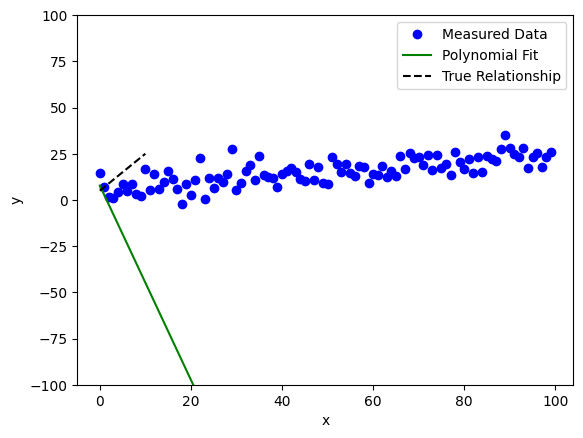

In [11]:
# Example usage
# Generate some synthetic data
x = np.linspace(0, 10, 100)
y_true = 2 * x + 5
noise = np.random.normal(0, 5, x.shape)
y = y_true + noise

# Define the coordinate ranges for fitting
fit_ranges = [[1, 3], [7, 9]]  # Two non-contiguous ranges for fitting

# Fit a polynomial of order 1 (linear fit) to the data within the specified ranges
fit_degree = 1
coordinate, data, coordinate_ranges, y_fit = fit_polynomial(y, "x", fit_ranges, fit_degree)

# Plot the results
plt.plot(coordinate, data, 'bo', label='Measured Data')
#for coordinate_range in coordinate_ranges:
#    plt.plot(coordinate_range, data.sel(x=coordinate_range), 'ro', label='Data Range for Fitting')
plt.plot(coordinate, y_fit, 'g-', label='Polynomial Fit')
plt.plot(x, y_true, 'k--', label='True Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-100, 100])
plt.legend()
plt.show()

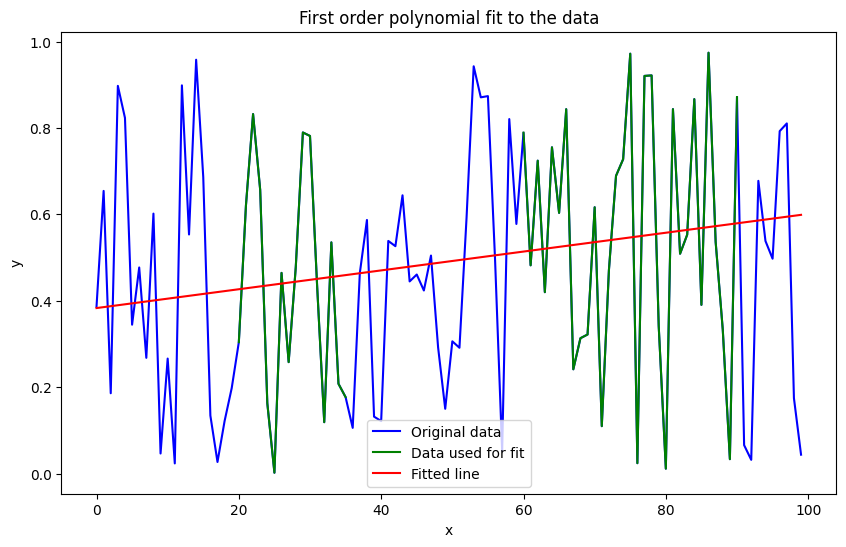

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Let's create some dummy data
data = np.random.rand(100)
da = xr.DataArray(data, dims='x', coords={'x': np.arange(100)})

# Define two non-contiguous ranges for fitting
range1 = slice(20, 35)
range2 = slice(60, 90)

# Combine ranges
combined_range = np.r_[da['x'].sel(x=range1).values, da['x'].sel(x=range2).values]
combined_data = np.r_[da.sel(x=range1).values, da.sel(x=range2).values]

# Fit a first order polynomial to the data within the ranges
coeffs = np.polyfit(combined_range, combined_data, 1)

# Now you can use these coefficients to predict
fitted_poly = np.poly1d(coeffs)
prediction = fitted_poly(da['x'].values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(da['x'].values, da.values, label='Original data', color='blue')
plt.plot(da['x'].sel(x=range1).values, da.sel(x=range1).values, 'g', label='Data used for fit')
plt.plot(da['x'].sel(x=range2).values, da.sel(x=range2).values, 'g')
plt.plot(da['x'].values, prediction, color='red', label='Fitted line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('First order polynomial fit to the data')
plt.show()
